# Data Visualization Lab exam

Lucia Hrovatin 

July, 09th 2021

## Question 5

#### Consider the datafile Colposcopies.csv collecting data about quality assessment of digital colposcopies for 287 individuals. Every colposcopy is described by 62 variables, while the last column ("label") classifies the colposcopy as of good (1) or bad (0) quality. Using the 62 describing features, prepare a 2-dim tSNE and a 2-dim UMAP plot, with the 287 samples colored according to their label and discuss what dimensionality reduction algorithm provides better separation between the two different classes of samples (0 and 1). 

In [16]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import time
import seaborn as sns

In [3]:
# import dataset
df_col = pd.read_csv("Colposcopies.csv", sep=",")
df_col

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,label
0,1.0,0.023609,0.000000,0.000000,0.015890,0.015890,0.0,0.000000,0.0,0.008122,...,1.003585,0.996427,0.556931,1.795553,1.062704,0.940996,356.792378,0.483803,0.402563,1
1,1.0,0.018952,0.000000,0.000000,0.035799,0.035799,0.0,0.000000,0.0,0.011939,...,1.007799,0.992261,0.586089,1.706225,1.067302,0.936942,114.582130,0.254779,0.299704,1
2,1.0,0.010291,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000206,...,1.007799,0.992261,0.586089,1.706225,1.067302,0.936942,114.582130,0.396631,0.299704,1
3,1.0,0.010014,0.000000,0.000000,0.021536,0.021536,0.0,0.000000,0.0,0.003542,...,1.003585,0.996427,0.556931,1.795553,1.062704,0.940996,356.792378,0.616388,0.402563,1
4,1.0,0.009913,0.000000,0.000000,0.016644,0.016644,0.0,0.000000,0.0,0.000689,...,1.003585,0.996427,0.556931,1.795553,1.062704,0.940996,356.792378,0.261678,0.402563,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.000000,0.936624,0.000000,0.062903,0.000000,0.0,0.004456,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
283,0.0,0.000000,0.844745,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
284,0.0,0.000000,0.714289,0.000000,0.007023,0.000000,0.0,0.009832,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
285,0.0,0.000000,0.495569,0.522725,0.007169,0.000000,0.0,0.014465,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0


In [5]:
# get labels of the class
labels = list(df_col['label'])

#check number of class
len(set(labels))


2

In [9]:
# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, random_state=10)
tsne_results = tsne.fit_transform(df_col)

# add results to df
df_col['tsne-2d-one'] = tsne_results[:,0]
df_col['tsne-2d-two'] = tsne_results[:,1]
df_col['y'] = labels



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 287 samples in 0.000s...
[t-SNE] Computed neighbors for 287 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 287 / 287
[t-SNE] Mean sigma: 119.855642
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.064293
[t-SNE] KL divergence after 300 iterations: 0.268148


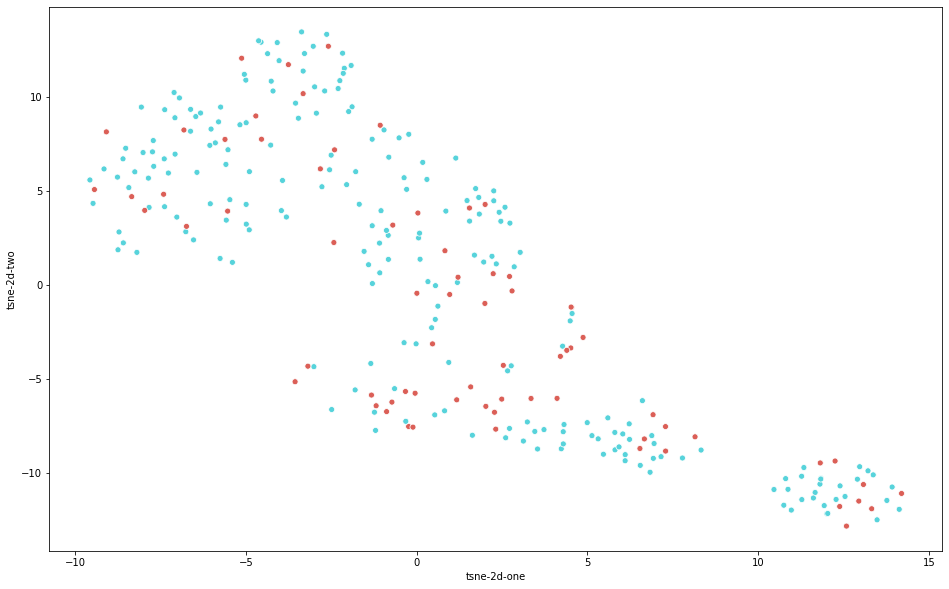

In [10]:
# plot results
n_col = len(set(labels))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", n_col),
    data=df_col,
    legend=None,
    alpha=1
)

In [11]:
# reimport dataset
df_col = pd.read_csv("Colposcopies.csv", sep=",")
df_col

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,label
0,1.0,0.023609,0.000000,0.000000,0.015890,0.015890,0.0,0.000000,0.0,0.008122,...,1.003585,0.996427,0.556931,1.795553,1.062704,0.940996,356.792378,0.483803,0.402563,1
1,1.0,0.018952,0.000000,0.000000,0.035799,0.035799,0.0,0.000000,0.0,0.011939,...,1.007799,0.992261,0.586089,1.706225,1.067302,0.936942,114.582130,0.254779,0.299704,1
2,1.0,0.010291,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000206,...,1.007799,0.992261,0.586089,1.706225,1.067302,0.936942,114.582130,0.396631,0.299704,1
3,1.0,0.010014,0.000000,0.000000,0.021536,0.021536,0.0,0.000000,0.0,0.003542,...,1.003585,0.996427,0.556931,1.795553,1.062704,0.940996,356.792378,0.616388,0.402563,1
4,1.0,0.009913,0.000000,0.000000,0.016644,0.016644,0.0,0.000000,0.0,0.000689,...,1.003585,0.996427,0.556931,1.795553,1.062704,0.940996,356.792378,0.261678,0.402563,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.000000,0.936624,0.000000,0.062903,0.000000,0.0,0.004456,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
283,0.0,0.000000,0.844745,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
284,0.0,0.000000,0.714289,0.000000,0.007023,0.000000,0.0,0.009832,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0
285,0.0,0.000000,0.495569,0.522725,0.007169,0.000000,0.0,0.014465,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0


In [36]:
# umap 
from sklearn.metrics import matthews_corrcoef
from umap import UMAP
from sklearn.model_selection import train_test_split

labels = df_col["labels"]
df_col = df_col.drop("labels")

X_train, X_test, y_train, y_test = train_test_split(df_col,
                                                    labels,
                                                    stratify=labels,
                                                    random_state=42)
# division in train and test set 
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
test_embedding = trans.transform(X_test)

plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Test set by UMAP');



ModuleNotFoundError: No module named 'umap'

The t-SNE tuned to perplexity 50 (usually values are 5 or 50) does not seem to be very accurate. Indeed, the model fails to separate the different classes. Probably a proper prepocessing of the dataset should help. Indeed, the perplexity parameter should be tuned in a different way (perhaps a grid search using k-fold cross validation), taking into account the topology of the data set itself. The UMAP, on the other hand, performs better. It may also be noticed as UMAP has been performed using a validation set approach, while t-SNE not.  